In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://drive.usercontent.google.com/download?id=11qtTIdcbxB-kVhVlVDii_idlFvghUxCY&export=download&confirm=t&uuid=5ae151ee-01b9-41fc-a466-e99fe2db146c'
df = pd.read_excel(url)

In [3]:
df.head()

,Student id,Student status,Math exam grade,Revision time,Physics,Finance,Physics*Revision,Finance*Revision,Unnamed: 8,Unnamed: 9,Finance.1,Physics.1,Revision,Constant,Unnamed: 14,Unnamed: 15
0,1.0,Economics,35.0,1.0,0.0,0.0,0.0,0.0,NaN,Coefficient,0.123632,10.963364,1.909849,35.272407,NaN,NaN
1,2.0,Economics,66.0,20.0,0.0,0.0,0.0,0.0,NaN,Standard error,3.870195,3.895561,0.271792,3.799235,NaN,NaN
2,3.0,Finance,43.0,9.0,0.0,1.0,0.0,9.0,NaN,R-squared,0.67579,8.77636,NaN,NaN,NaN,NaN
3,4.0,Physics,73.0,11.0,1.0,0.0,11.0,0.0,NaN,NaN,18.064944,26,NaN,NaN,NaN,NaN
4,5.0,Economics,69.0,16.0,0.0,0.0,0.0,0.0,NaN,NaN,4174.329754,2002.636912,NaN,NaN,NaN,NaN


In [4]:
# Remove unnecesary rows and columns
df = df.iloc[:30,1:4]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student status   30 non-null     object 
 1   Math exam grade  30 non-null     float64
 2   Revision time    30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 852.0+ bytes


In [6]:
# Rename index and check resulting dataframe
df.index.name = 'ID'
df.head()


,Student status,Math exam grade,Revision time
ID,,,
0,Economics,35.0,1.0
1,Economics,66.0,20.0
2,Finance,43.0,9.0
3,Physics,73.0,11.0
4,Economics,69.0,16.0


<Figure size 1920x1440 with 0 Axes>

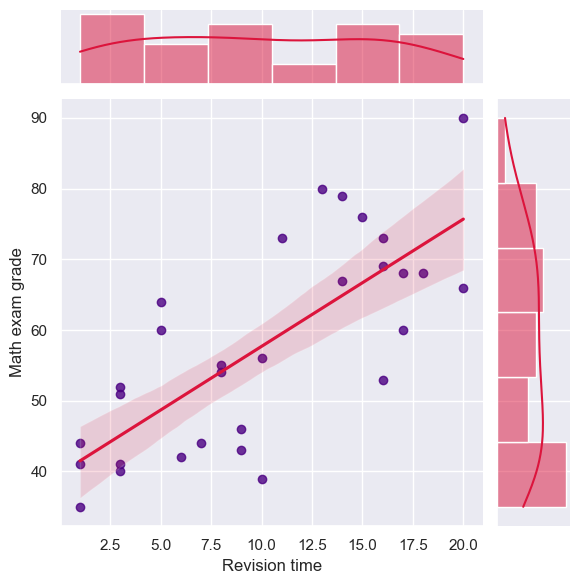

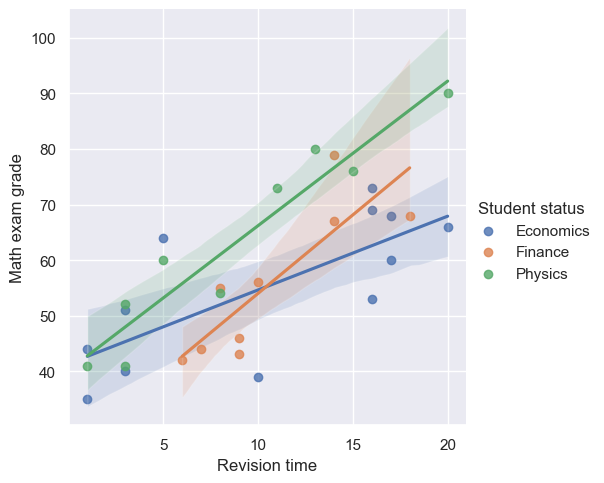

In [7]:
# Plot Math exam grade vs Revision time
sns.set_theme()
plt.figure(dpi=300)

sns.jointplot(data=df, x='Revision time', y='Math exam grade',
              color='crimson', kind='reg', scatter_kws={"color": "indigo"})

sns.lmplot(data=df, x='Revision time', y='Math exam grade', hue='Student status')


# 

### Model zero

In [8]:
# Define predicted and predicting variables
y = df['Math exam grade']
x = df.drop(['Math exam grade', 'Student status'], axis=1)

# We create 'Constant' column
x['Constant'] = 1

# Reorder columns to put Constant at the beginning
col = x.pop('Constant') 
x.insert(0, 'Constant', col)

# Check predicting ds
# We'll include a constant to predict
x.head()

,Constant,Revision time
ID,,
0,1,1.0
1,1,20.0
2,1,9.0
3,1,11.0
4,1,16.0


In [9]:
# A simple linear regression model with constant and no dummy variables
model = sm.OLS(y, x)

results = model.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})


print('R Squared:', results.rsquared, '\n')
print('Dependent Variable: Math exam grade' )
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)

R Squared: 0.5564459379831481 

Dependent Variable: Math exam grade
                   betas  std error  t-statistic      p-values
Constant       39.694335    3.52464    11.261953  6.558971e-12
Revision time   1.799899    0.30369     5.926758  2.229071e-06


# 

In [10]:
# A more detailed analysis takes account of the type of student
# So we create dummy variables out of the 'Student status column'

df0 = pd.get_dummies(df, columns=['Student status'], drop_first=False)
df0.rename(columns={'Student status_Economics':'Economics', 'Student status_Finance':'Finance', 
                   'Student status_Physics':'Physics'}, inplace=True)

df0.replace({False:0, True:1}, inplace=True)
df0.head()

,Math exam grade,Revision time,Economics,Finance,Physics
ID,,,,,
0,35.0,1.0,1,0,0
1,66.0,20.0,1,0,0
2,43.0,9.0,0,1,0
3,73.0,11.0,0,0,1
4,69.0,16.0,1,0,0


#

#### First model

In [11]:
# Again, we define predicted and predicting variables

y = df0['Math exam grade']
x = df0.drop(['Math exam grade'], axis=1)
x_ = df0.drop(['Math exam grade', 'Economics'], axis=1)
x_['Constant'] = 1

# Reorder columns to put Revision time at the  end
col = x.pop('Revision time') 
x.insert(3, 'Revision time', col)

col = x_.pop('Revision time') 
x_.insert(2, 'Revision time', col)

col = x_.pop('Constant') 
x_.insert(0, 'Constant', col)

# Check predicting dataframes
# We won't include any constant in this ds
x.head()

,Economics,Finance,Physics,Revision time
ID,,,,
0,1,0,0,1.0
1,1,0,0,20.0
2,0,1,0,9.0
3,0,0,1,11.0
4,1,0,0,16.0


In [12]:
# We'll include a constant
x_.head()

,Constant,Finance,Physics,Revision time
ID,,,,
0,1,0,0,1.0
1,1,0,0,20.0
2,1,1,0,9.0
3,1,0,1,11.0
4,1,0,0,16.0


In [13]:
# model_1. NO constant with dummy variables

model_1 = sm.OLS(y, x)
results = model_1.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})


print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)
print()

# Alternatively, we may keep the constant and remove one dummy variable, e.g. 'Economics'
model_1_1 = sm.OLS(y, x_)
results = model_1_1.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})

print('============================================================== \n')
print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)

R Squared: 0.6758
Dependent Variable: Math exam grade 

                   betas  std error  t-statistic      p-values
Economics      35.272407   3.799235     9.284082  9.727389e-10
Finance        35.396039   4.097429     8.638597  4.068073e-09
Physics        46.235770   3.774912    12.248170  2.659233e-12
Revision time   1.909849   0.271792     7.026889  1.840057e-07


R Squared: 0.6758
Dependent Variable: Math exam grade 

                   betas  std error  t-statistic      p-values
Constant       35.272407   3.799235     9.284082  9.727389e-10
Finance         0.123632   3.870195     0.031945  9.747601e-01
Physics        10.963364   3.895561     2.814322  9.191619e-03
Revision time   1.909849   0.271792     7.026889  1.840057e-07


#### Notice that 'Constant ' in the second model is equal to 'Economics' variable in the first model. Also 'Constant' plus 'Finance' or 'Physics' in the second model equals 'Finance' or 'Physics' in the first one. 'Revision Time' is identical in both models

# 

### Second model

In [14]:
# Add interaction variables

df0['Economics*Revision'] = df0['Economics']*df0['Revision time']
df0['Finance*Revision'] = df0['Finance']*df0['Revision time']
df0['Physics*Revision'] = df0['Physics']*df0['Revision time']
df0.head()

# And create predicting and predicted variables. 
# This time we won´t use the Economics, Finance, Physics variables.

y = df0['Math exam grade']
x = df0.drop(['Math exam grade', 'Economics', 'Finance', 'Physics', 'Revision time'], axis=1)
x_ = df0.drop(['Math exam grade', 'Economics', 'Finance', 'Physics', 'Economics*Revision'], axis=1)

# We create a 'Constant' column
x['Constant'] = 1
x_['Constant'] = 1

# Reorder columns to 'Constant' at the beginning
col = x.pop('Constant') 
x.insert(0, 'Constant', col)

col = x_.pop('Constant') 
x_.insert(0, 'Constant', col)

# Check predicting dataframes
# We won't include the 'Revision time' variable in this ds
x.head()

,Constant,Economics*Revision,Finance*Revision,Physics*Revision
ID,,,,
0,1,1.0,0.0,0.0
1,1,20.0,0.0,0.0
2,1,0.0,9.0,0.0
3,1,0.0,0.0,11.0
4,1,16.0,0.0,0.0


In [15]:
# We use the 'Revision time' variable with this ds
x_.head()

,Constant,Revision time,Finance*Revision,Physics*Revision
ID,,,,
0,1,1.0,0.0,0.0
1,1,20.0,0.0,0.0
2,1,9.0,9.0,0.0
3,1,11.0,0.0,11.0
4,1,16.0,0.0,0.0


In [16]:
# model_2. NO 'Revision time' with dummy variables and constant

model_2 = sm.OLS(y, x)
results = model_2.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})


print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)
print()

# Alternatively, we may keep the Revision time and remove one dummy variable, e.g. 'Economics*Revision'
# We also keep the constant

model_2_1 = sm.OLS(y, x_)
results = model_2_1.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})

print('==================================================================== \n')
print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)

R Squared: 0.7184
Dependent Variable: Math exam grade 

                        betas  std error  t-statistic      p-values
Constant            38.850189   2.961343    13.119112  5.666994e-13
Economics*Revision   1.492187   0.271471     5.496678  9.105784e-06
Finance*Revision     1.719816   0.348816     4.930438  4.037619e-05
Physics*Revision     2.703651   0.343063     7.880927  2.340549e-08


R Squared: 0.7184
Dependent Variable: Math exam grade 

                      betas  std error  t-statistic      p-values
Constant          38.850189   2.961343    13.119112  5.666994e-13
Revision time      1.492187   0.271471     5.496678  9.105784e-06
Finance*Revision   0.227628   0.312473     0.728472  4.728353e-01
Physics*Revision   1.211464   0.319150     3.795911  7.942697e-04


####  Notice that 'Revision time ' in the second model is equal to 'Economics x Revision' variable in the first model. Also 'Revision time' plus Finance x Revision or Physics x Revision in the second model equals Finance x Revision or Physics x Revision in the first one. 'Const' is identical in both models

# 

### Third Model

In [17]:
# For this third model we'll drop the 'Constant' columns in both ds

x.drop(['Constant'], axis=1, inplace=True)
x_.drop(['Constant'], axis=1, inplace=True)

# Check predicting ds
x.head()

,Economics*Revision,Finance*Revision,Physics*Revision
ID,,,
0,1.0,0.0,0.0
1,20.0,0.0,0.0
2,0.0,9.0,0.0
3,0.0,0.0,11.0
4,16.0,0.0,0.0


In [18]:
x_.head()

,Revision time,Finance*Revision,Physics*Revision
ID,,,
0,1.0,0.0,0.0
1,20.0,0.0,0.0
2,9.0,9.0,0.0
3,11.0,0.0,11.0
4,16.0,0.0,0.0


In [19]:
# model_3. NO 'Revision time' and No constant with dummy variables 

model_3 = sm.OLS(y, x)
results = model_3.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})


print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)
print()

# Alternatively, we may keep the Revision time and remove one dummy variable, e.g. 'Economics*Revision'
# NO constant

model_3_1 = sm.OLS(y, x_)
results = model_3_1.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})

print('==================================================================== \n')
print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)

R Squared: 0.8748
Dependent Variable: Math exam grade 

                       betas  std error  t-statistic      p-values
Economics*Revision  4.060286   0.509489     7.969322  1.448779e-08
Finance*Revision    4.994676   0.659962     7.568126  3.851791e-08
Physics*Revision    5.703812   0.692697     8.234213  7.684201e-09


R Squared: 0.8748
Dependent Variable: Math exam grade 

                     betas  std error  t-statistic      p-values
Revision time     4.060286   0.509489     7.969322  1.448779e-08
Finance*Revision  0.934391   0.833744     1.120716  2.722785e-01
Physics*Revision  1.643527   0.859889     1.911325  6.663227e-02


#### Except for the constant, we conclude the same as before.

# 

### Fourth Model

In [20]:
y = df0['Math exam grade']
x = df0.drop(['Math exam grade', 'Revision time'], axis=1)
x_ = df0.drop(['Math exam grade', 'Economics', 'Economics*Revision'], axis=1)

# We create a 'Constant' column
x_['Constant'] = 1

# Reorder columns to 'Constant' at the beginning
col = x_.pop('Constant') 
x_.insert(0, 'Constant', col)

col = x_.pop('Revision time') 
x_.insert(3, 'Revision time', col)

# Check resulting ds
x.head()

,Economics,Finance,Physics,Economics*Revision,Finance*Revision,Physics*Revision
ID,,,,,,
0,1,0,0,1.0,0.0,0.0
1,1,0,0,20.0,0.0,0.0
2,0,1,0,0.0,9.0,0.0
3,0,0,1,0.0,0.0,11.0
4,1,0,0,16.0,0.0,0.0


In [21]:
x_.head()

,Constant,Finance,Physics,Revision time,Finance*Revision,Physics*Revision
ID,,,,,,
0,1,0,0,1.0,0.0,0.0
1,1,0,0,20.0,0.0,0.0
2,1,1,0,9.0,9.0,0.0
3,1,0,1,11.0,0.0,11.0
4,1,0,0,16.0,0.0,0.0


In [22]:
# model_4. NO 'Revision time' and No constant with dummy variables 

model_4 = sm.OLS(y, x)
results = model_4.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})


print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)
print()

# Alternatively, we may keep Revision time and constant and 
# remove two dummy variable, e.g. 'Economics' and 'Economics*Revision'

model_4_1 = sm.OLS(y, x_)
results = model_4_1.fit()

betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})

print('=================================================================== \n')
print('R Squared:', round(results.rsquared, 4))
print('Dependent Variable: Math exam grade' , '\n')
Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
print(Summary)

R Squared: 0.7507
Dependent Variable: Math exam grade 

                        betas  std error  t-statistic      p-values
Economics           41.331824   4.143937     9.974046  5.171328e-10
Finance             25.711091   8.043147     3.196646  3.871999e-03
Physics             40.146999   4.704757     8.533278  9.884219e-09
Economics*Revision   1.328145   0.330110     4.023346  4.967150e-04
Finance*Revision     2.827370   0.718762     3.933665  6.229625e-04
Physics*Revision     2.603506   0.441287     5.899810  4.361382e-06


R Squared: 0.7507
Dependent Variable: Math exam grade 

                      betas  std error  t-statistic      p-values
Constant          41.331824   4.143937     9.974046  5.171328e-10
Finance          -15.620733   9.047897    -1.726449  9.711918e-02
Physics           -1.184825   6.269526    -0.188982  8.516963e-01
Revision time      1.328145   0.330110     4.023346  4.967150e-04
Finance*Revision   1.499225   0.790944     1.895490  7.013341e-02
Physics*Revisi

### We tried five models, that was enough for us to understand how to create dummy variables. Sometimes, we drop one of them, sometimes,  we use them all, while the coefficients change accordingly.